In [1]:
from pathlib import Path
import sys
import os
#configura a origem do projeto no diretório raiz
sys.path.append(str(Path('').absolute().parent))

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import tweetlib.utils as utils
from tweetlib.influencer_gui import Influencer

### Tópico 0: conceitos básicos

#### métodos & funções

In [ ]:
def write(params):
    print(params)
    
def add(a, b):
    return a+b

In [ ]:
write('Hellow World!')

In [ ]:
add(2, 3)

#### listas

In [ ]:
list1 = [1,2,'a',3,4,5]
list2 = list(range(1,6))
print(list1)
print(list2)

In [ ]:
list2.append(15)
list2

In [ ]:
list2[1] = 7
list2

#### tuplas

In [ ]:
tuple1 = (1,2,3)
tuple2 = tuple([1,2,3])
print(tuple1)
print(tuple2)

#### conjuntos

In [ ]:
set1 = {1,2,3,4}
set2 = set([1,2,1,3,4,2,1])
print(set1)
print(set2)

#### dicionários

In [ ]:
dict1 = {'key1':1, 'key2':2}
print(dict1)

In [ ]:
dict1['key1']

In [ ]:
dict1['key3'] = 10

if dict1.get('key3') is not None:
    print(dict1['key3'])
    

Lê o arquivo ``B3_companies.csv``que contém informações sobre as empresas negociadas na bolsa

In [2]:
df_b3_companies = pd.read_csv('./B3_companies.csv')
df_b3_companies

,SETOR ECONÔMICO,SUBSETOR,SEGMENTO,NOME DA EMPRESA,CÓDIGO
0,"Petróleo, Gás e Biocombustíveis","Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",COSAN,CSAN
1,"Petróleo, Gás e Biocombustíveis","Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",DOMMO,DMMO
2,"Petróleo, Gás e Biocombustíveis","Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",ENAUTA PART|ENAUTA,ENAT
3,"Petróleo, Gás e Biocombustíveis","Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",PET MANGUINH,RPMG
4,"Petróleo, Gás e Biocombustíveis","Petróleo, Gás e Biocombustíveis","Exploração, Refino e Distribuição",PETROBRAS|PETROBRÁS,PETR
...,...,...,...,...,...
418,Outros,Outros,Outros,POLPAR,PPAR
419,Outros,Outros,Outros,PROMPT PART,PRPT
420,Outros,Outros,Outros,SELECTPART,SLCT
421,Outros,Outros,Outros,SUDESTE S/A,OPSE


Lista todos os nomes dos arquivos dentro do diretório ``./influencers``, que se encontra na raiz do projeto

In [3]:
csv_files = os.listdir('./influencers')
csv_files

['albuquerque_af_tweets.csv',
 'cafecomferri_tweets.csv',
 'mycapinvest_tweets.csv',
 'tradersclubbr_tweets.csv',
 'hbredda_tweets.csv',
 'israel_massa_tweets.csv',
 'isabelablima_tweets.csv',
 'FilipeVillegas_tweets.csv',
 'GeralNews_tweets.csv',
 'ativacorretora_tweets.csv',
 'sergiosanita_tweets.csv',
 'FastTrade_cedro_tweets.csv',
 'bernardocorazza_tweets.csv',
 'WeInvestDigital_tweets.csv',
 'BruceBarbosa88_tweets.csv']

In [4]:
df = pd.read_csv('./influencers/{}'.format(csv_files[0])) 
df

,id,created_at,text
0,1289277893101490176,2020-07-31 19:12:57,"@Luizfrfranca Sim, escolheram"
1,1289277608677392384,2020-07-31 19:11:50,Oferta da Vasta 15x book a 19.00 e os bancos e...
2,1289273387748139009,2020-07-31 18:55:03,Cialão salvou parte do dia\n\nPqp\n\nShort na ...
3,1289239722129149952,2020-07-31 16:41:17,Apareceu a surpresinha\n\n*BC DEVE AUTORIZAR T...
4,1289222793502920705,2020-07-31 15:34:01,"Stone valendo 67 bilhões, nova máxima históric..."
...,...,...,...
3217,1240994826398633984,2020-03-20 13:33:17,RT @jlbraga: @albuquerque_af Escrevi sobre iss...
3218,1240988946731065345,2020-03-20 13:09:56,Nunca vi o Stuba com 50% em ações. \n\nAlguém ...
3219,1240988069970534402,2020-03-20 13:06:26,5% de taxa de mortalidade\n\nA gripezinha da f...
3220,1240980276114792451,2020-03-20 12:35:28,Um dos hospitais mais respeitados do mundo adi...


### Tópico 1: Classes

* O método ``Incluencer.filter_tweets`` filtra os tweets de um dado ``pandas.DataFrame``, retornando apenas os tweets que falam de alguma empresa.

In [5]:
influencers = []
for filename in csv_files:    
    influencer = Influencer(profile=filename[:-11], filepath='./influencers/{}'.format(filename))
    influencer.filter_tweets(df_b3_companies)
    influencers.append(influencer)

/home/guilherme/.local/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [ ]:
len(influencers)

In [6]:
tweets_distrib = {}
for influencer in influencers:
    tweets_distrib[influencer.profile] = len(influencer.tweets)
    
    
tweets_distrib

{'albuquerque_af': 170,
 'cafecomferri': 385,
 'mycapinvest': 854,
 'tradersclubbr': 2305,
 'hbredda': 302,
 'israel_massa': 605,
 'isabelablima': 221,
 'FilipeVillegas': 4106,
 'GeralNews': 220,
 'ativacorretora': 634,
 'sergiosanita': 328,
 'FastTrade_cedro': 1231,
 'bernardocorazza': 214,
 'WeInvestDigital': 1291,
 'BruceBarbosa88': 409}

In [ ]:
tweets_distrib['tradersclubbr']

### Tópico 2:  List/Dictionary comprehension 

In [ ]:
tweets_distrib_compr = {influencer.profile : len(influencer.tweets) for influencer in influencers}
tweets_distrib_compr

In [ ]:
print(tweets_distrib_compr.keys(), '\n')
print(tweets_distrib_compr.values())

In [ ]:
print(sorted(tweets_distrib_compr.keys()), '\n')
print(sorted(tweets_distrib_compr.values()))

#### Tópico 2.1: Build-in functions

* Encontre os perfis com o maior e menor número de tweets e print eles

In [ ]:
# get the max and min values
max_value, min_value = max(tweets_distrib_compr.values()), min(tweets_distrib_compr.values())

# iterate over the dictionary comparing the 
for profile, number_tweets in tweets_distrib_compr.items():
    if number_tweets == max_value:
        print('max', profile, number_tweets)
    elif number_tweets == min_value:
        print('min', profile, number_tweets)

In [ ]:
for profile in tweets_distrib_compr.keys():
    number_tweets = tweets_distrib_compr[profile]
    
    if number_tweets == max_value:
        print('max', profile, number_tweets)
    elif number_tweets == min_value:
        print('min', profile, number_tweets)

In [ ]:
tweets_distrib_compr.items()

Refazendo o mesmo exercício, porém usando ``filter(function, iterable)``

In [ ]:
def filtra(item):
    if item[1] == max_value or item[1] == min_value:
        return True
    
    return False

In [ ]:
filtered_items = filter(lambda item: item[1] == max_value or item[1] == min_value, tweets_distrib_compr.items())
filtered_items = list(filtered_items)
filtered_items.sort(key=lambda x: x[1])
print('min', filtered_items[0][0], filtered_items[0][1])
print('max', filtered_items[1][0], filtered_items[1][1])

In [ ]:
filtered_items[0][0]

In [ ]:
filtered_items = sorted(filtered_items)

* calcule o número total de tweets, ou seja, a soma dos número de tweets por perfil

In [ ]:
#iterative form
total = 0
for n in tweets_distrib_compr.values():
    total += n
print('Número total de tweets é', total)


# using build-in functions
total2 = sum(tweets_distrib_compr.values())
print('Número total de tweets é', total2)

### Tópico 3: Numpy

* Printando Estatísticas

In [ ]:
# Corrija o erro abaixo e print as estatísticas sobre o número de tweets por perfil
number_tweets = list(tweets_distrib_compr.values())
number_tweets = np.array(number_tweets)

print('Max', number_tweets.max(), 'Min', number_tweets.min())
print('Mean', number_tweets.mean(), 'Standard Deviation', number_tweets.std())

* Encontre a probabilidade de se escolher um tweet ao acaso e ele ser de cada um dos perfis. 

**Dica**: Divida o número de tweets por perfil pelo número total de tweets

In [ ]:
number_tweets.sum()

In [ ]:
number_tweets

In [ ]:
probs = number_tweets/number_tweets.sum()
print(probs.shape, probs)

* Encontre a probabilidade de se escolher 2 tweets ao acaso e eles serem dos perfis i e j, para todo i,j

Assuma *P(i, j) = P(i).P(j)*

In [ ]:
print(probs)
probs*probs

In [ ]:
joint_probs = np.outer(probs, probs)
print("Probabilidade de se escolher 2 tweets do perfil 0", joint_probs[0,0])
print("Probabilidade de se escolher 1 tweet do perfil 5 e outro do perfil 7", joint_probs[5,7])
print(joint_probs.shape)
joint_probs

Outra forma de se resolver esse problema

In [ ]:
a = probs.reshape((1,-1))
a

In [ ]:
joint_probs = probs.reshape((1,-1))
joint_probs.T*joint_probs

In [ ]:
joint_probs[5:7, 10:13]

In [ ]:
matrix = np.array([[3,6,8,2,1], [5,2,1,8,7], [4,9,6,0,1]])
matrix

Retorna o valor máximo por colunas

In [ ]:
matrix.max(axis=0)

Retorna o valor máximo por linhas

In [ ]:
matrix.max(axis=1)

### Tópico 4: Pandas

In [ ]:
df_b3_companies.head(5)

In [ ]:
df_b3_companies.tail(10)

In [ ]:
df_b3_companies.describe()

* Mostre quais são todos os segmentos no arquivo de empresas da B3

In [ ]:
df_b3_companies['SEGMENTO'].unique()

* Selecione todas as empresas do segmento de "Agricultura"

In [ ]:
df_b3_companies[df_b3_companies['SEGMENTO'] == 'Agricultura']

* Selecione as empresas do subsetor "Petróleo, Gás e Biocombustíveis" **OU** do segmento "Bancos"

In [ ]:
df_b3_companies[(df_b3_companies['SUBSETOR'] == 'Petróleo, Gás e Biocombustíveis') |
                (df_b3_companies['SEGMENTO'] == 'Bancos')]

* Selecione as empresas do subsetor "Petróleo, Gás e Biocombustíveis" **E** comecem com "P"

In [ ]:
df_b3_companies[(df_b3_companies['SUBSETOR'] == 'Petróleo, Gás e Biocombustíveis') &
                (df_b3_companies['NOME DA EMPRESA'].str.startswith('P'))]

* Conte o número de empresas por cada setor econômico

In [ ]:
df_b3_companies['SETOR ECONÔMICO'].value_counts()

* Plote o número de empresas por setor econômico

In [ ]:
fig = plt.figure(figsize=(8,6))

# group values by 'SETOR ECONÔMICO' and count the number of unique values using nunique() function
df_b3_companies.groupby('SETOR ECONÔMICO')['CÓDIGO'].nunique().plot(kind='bar')

### Tópico 5: Matplotlib

In [ ]:
tweets_distrib

In [165]:
distrib = sorted(tweets_distrib.items(), key=lambda x: x[1], reverse=True)
distrib

[('FilipeVillegas', 4106),
 ('tradersclubbr', 2305),
 ('WeInvestDigital', 1291),
 ('FastTrade_cedro', 1231),
 ('mycapinvest', 854),
 ('ativacorretora', 634),
 ('israel_massa', 605),
 ('BruceBarbosa88', 409),
 ('cafecomferri', 385),
 ('sergiosanita', 328),
 ('hbredda', 302),
 ('isabelablima', 221),
 ('GeralNews', 220),
 ('bernardocorazza', 214),
 ('albuquerque_af', 170)]

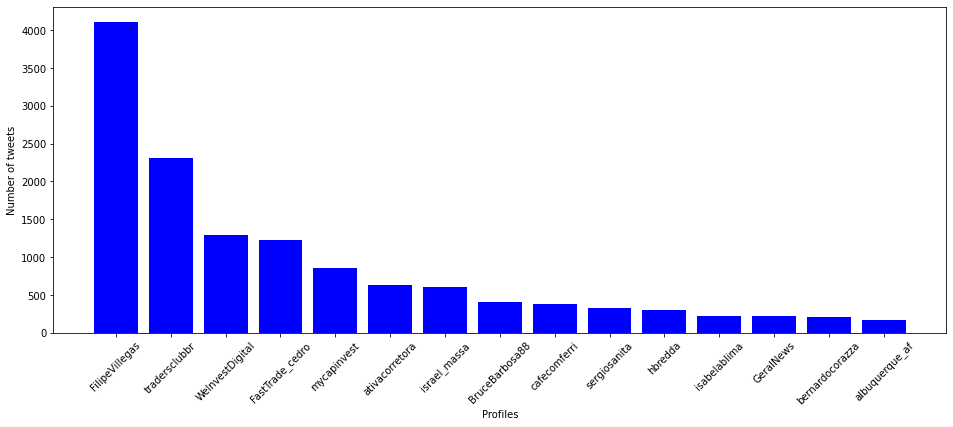

In [113]:
distrib = sorted(tweets_distrib.items(), key=lambda x: x[1], reverse=True)

keys = [item[0] for item in distrib]
values = [item[1] for item in distrib]

fig = plt.figure(figsize=(16,6))

plt.bar(keys, values, color='blue')
plt.xlabel('Profiles')
plt.ylabel('Number of tweets')

plt.xticks(list(range(len(keys))), keys, rotation=45)
plt.show()

**Mais Exemplos** https://matplotlib.org/gallery/index.html

### Exercícios

**1)** a) Implemente o método ``get_total_tweets()`` na classe ``Influencers`` que retorne o tamanho de sua lista de tweets

In [ ]:
influencer = Influencer(profile='isabelablima', filepath='./influencers/isabelablima_tweets.csv')

assert len(influencer.tweets) == influencer.get_total_tweets(), 'Não foi dessa vez :p'
print('concluído!')

b) Filtre os influencers de modo a retornar apenas aqueles que têm uma quantidade de tweets acima da média

In [ ]:
media = 0
for perfil in tweets_distrib.keys():
    media += tweets_distrib[perfil]
media = media / len(tweets_distrib)
maior_que_media = dict()
for perfil in tweets_distrib.keys():
    if tweets_distrib[perfil] > media:
        maior_que_media[perfil] = tweets_distrib[perfil]
print(maior_que_media)

**Resposta esperada**

{'WeInvestDigital': 1291,
 'tradersclubbr': 2305,
 'FilipeVillegas': 4106,
 'FastTrade_cedro': 1231}

**2)** Considere a matriz `` matrix``, tal que ``matrix[i,j]`` indica o número de tweets do perfil ``i`` no j-ésimo batch. Calcule:

a) o número médio de tweets por perfil 

b) o número médio de tweets em cada batch. 

In [ ]:
def media_por_perfil(matriz):
    media_perfil = []
    for i in range(len(matriz)):
        soma = matriz[i].sum()/len(matriz[i])
        media_perfil.append(soma)
    return media_perfil

def media_por_batch(matriz):
    qtd = len(matriz.T[0])
    resp = []
    for i in range(len(matriz[0])):
        resp.append(matriz.T[i].sum()/qtd)
    return resp
        
        
matrix = np.array([[120,200,530], 
                   [30,50,45],
                   [130,150,140],
                   [110,180,150],
                   [100,110,120],
                   [90,115,130]])

media_perfil = media_por_perfil(matrix)
media_batch = media_por_batch(matrix)
print(media_perfil)
print(media_batch)

**Valores esperados:**

a) [283.33333333, 41.66666667, 140., 146.66666667, 110., 111.66666667]

b) [ 96.66666667, 134.16666667, 185.83333333]

**3)** Considere o ``df_b3_companies`` (``pandas.DataFrame``) com as informações das empresas da B3. 

a) calcule o total empresas do segmento "Bancos" 

b) calcule o total empresas do segmento "Bancos" **E** tenham nomes alternativos, isto é bancos onde o nome de empresa contenha o caracter "|".

**Dica:** Utilize a função [pandas.Series.str.contains](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html)

In [ ]:
mask1 = df_b3_companies["SEGMENTO"]=="Bancos"
bancos = len(df_b3_companies[mask1])

mask2 = (mask1) & (df_b3_companies["NOME DA EMPRESA"].str.contains("|", regex=False))
print(len(df_b3_companies[mask1]))
print(len(df_b3_companies[mask2]))

**Valorer experados:** 

a) 24

b) 7

**4)** Plote o número de subsetores que cada setor econômico tem, para isso crie um gráfico de barras.

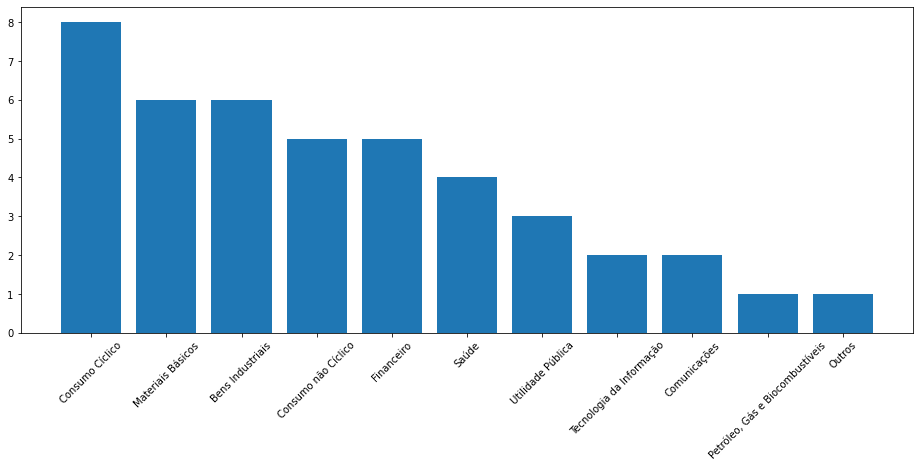

In [53]:
setores = df_b3_companies["SETOR ECONÔMICO"].unique()
qtd_subsetores = []
for i in range(len(setores)):
    mask = df_b3_companies["SETOR ECONÔMICO"] == setores[i]
    qtd_subsetores.append(len(df_b3_companies[mask]["SUBSETOR"].unique()))

# Até deu certo mas não acho que seja o melhor jeito de fazer
grafico1 = np.array([setores, qtd_subsetores])
grafico1 = sorted(grafico1.T, key= lambda x:x[1], reverse=True)
grafico1 = np.array(grafico1).T
fig2 = plt.figure(figsize=(16,6))
plt.bar(grafico1[0], grafico1[1])
plt.xticks(list(range(len(grafico1[0]))), grafico1[0], rotation=45)
plt.show()

**5)** Plote, usando Matplotlib, a porcentagem de tweets publicadas, em relação ao total de tweets, para cada perfil.

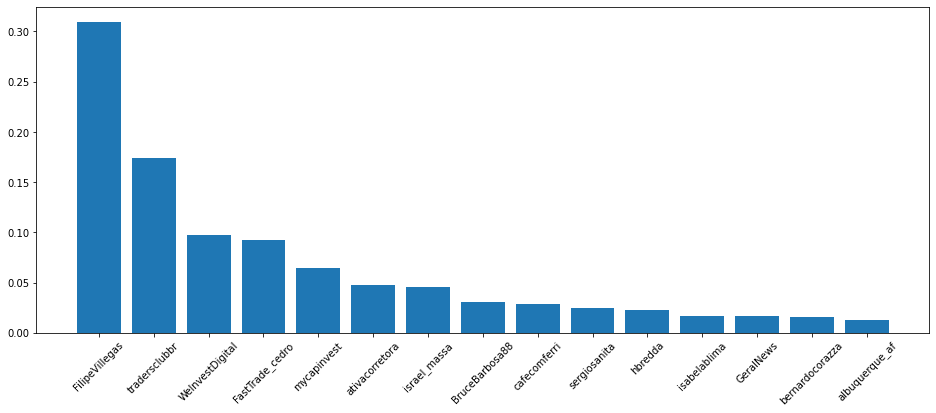

In [22]:
total = sum(tweets_distrib.values())
item = sorted(tweets_distrib.items(), key=lambda x: x[1], reverse=True)
label = []
dados = []

for item in item:
    label.append(item[0])
    dados.append(item[1] /total)
fig3 = plt.figure(figsize=(16,6))
plt.bar(label, dados)
plt.xticks(list(range(len(label))), label, rotation=45)
plt.show()

### Referências:

1 - Google/Stack OverFlow

2 - [Pandas Doc](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

3 - [Matplotlib Doc](https://matplotlib.org/)

4 - [Numpy Doc](https://numpy.org/doc/stable/index.html)